## Case_Malaria
#### 讀取影像(灰階)

In [ ]:
# 創建目錄
!mkdir -p train

In [1]:
# 上傳檔案
file = './train/train/00000.jpg'

import matplotlib.pyplot as plt
img = plt.imread(fname = file)
img.shape

(128, 128, 3)

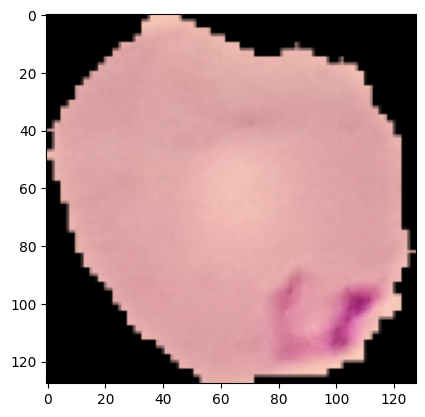

In [2]:
plt.imshow(img)
plt.show()

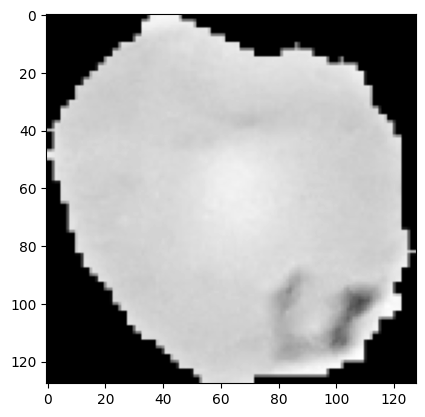

In [3]:
# 將圖片轉換成黑白
from skimage import color
img_gray = color.rgb2gray(img)
plt.imshow(img_gray, cmap = 'gray')
plt.show()

#### 讀取檔案所有清單

In [4]:
# 扁平化
img_flatten = img_gray.ravel()
print(img_flatten.shape)
img_flatten.max()

(16384,)


0.8425086

In [5]:
# 讀取所有檔案名稱

path = './train/train'
Xfiles = []

import os
for root, dirs, files in os.walk(path):
    for f in files:
        Xfiles.append(root + '/' + f)

In [6]:
# X數據數量及檔名
len(Xfiles), Xfiles[:5]

(21765,
 ['./train/train/00000.jpg',
  './train/train/00001.jpg',
  './train/train/00002.jpg',
  './train/train/00003.jpg',
  './train/train/00004.jpg'])

In [7]:
# y數據
import pandas as pd
yfiles = pd.read_csv('./train/train_labels.csv')
yfiles[:5], \
yfiles.shape

(    filename  infected
 0  00000.jpg         1
 1  00001.jpg         1
 2  00002.jpg         1
 3  00003.jpg         0
 4  00004.jpg         0,
 (21765, 2))

In [8]:
# 如何定位02791.jpg 
yfiles[yfiles.filename == '02791.jpg']['infected'].values[0]

1

In [ ]:
# X, y --> X_train, y_train
# 21765 --> 每次讀取一筆 --> 轉灰階 --> X_train
# train_labels.csv --> 被對應上面的影像名稱 --> one-hot --> y_train

In [ ]:
# X_train.shape = 21765, 128, 128, 1 channel單色階
# y_train.shape = 21765, 2

#### DNN_Gray

In [9]:
# X數據對應y數據
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage import color

X, y = [], []

for x in tqdm(Xfiles[:]):
    img = color.rgb2gray(plt.imread(x))
    X.append(img)
    y.append(yfiles[yfiles.filename == x.split('/')[-1]]['infected'].values[0])
    # print(x, img.shape, x.split('/')[-1], \
    #       yfiles[yfiles.filename == x.split('/')[-1]]['infected'].values[0])

100%|███████████████████████████████████████████████████████████████████████████| 21765/21765 [01:18<00:00, 277.86it/s]


In [10]:
# 轉換X, y
import numpy as np
X = np.array(X)
y = np.array(y)
X.shape, y.shape

((21765, 128, 128), (21765,))

In [11]:
# 區分出train、test數據
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17412, 128, 128), (4353, 128, 128), (17412,), (4353,))

In [12]:
# 導入函式庫
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from matplotlib import pyplot as plt

# 建立簡單的線性模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units = 256, input_dim = 128 * 128, 
                kernel_initializer = 'normal', activation = 'relu'))               # input + hidder layer
model.add(Dense(units = 128, kernel_initializer = 'normal', activation = 'relu'))  # hidder layer
model.add(Dense(units = 64, kernel_initializer = 'normal', activation = 'relu'))   # hidder layer
model.add(Dense(units = 2, kernel_initializer = 'normal', activation = 'softmax')) # Add output layer

# 選擇損失函數、優化方法及成效衡量方式
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4194560   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 4,235,842
Trainable params: 4,235,842
Non-trainable params: 0
_________________________________________________________________


In [13]:
X_train[0].max()

0.99358624

In [14]:
# 將training的label進行one-hot encoding（例如數字7經過One-hot encoding，轉換後是0000001000，即第7個值為1）
y_TrainOneHot = np_utils.to_categorical(y_train)

# 將training的input資料轉為二維
X_train_2D = X_train.reshape(X_train.shape[0], 128 * 128).astype('float32')
X_train_norm = X_train_2D  # 將訊號0-255轉換成0-1.0

In [15]:
# 進行訓練，訓練過程會存在train_history變數中
train_history = model.fit(x = X_train_norm,
                          y = y_TrainOneHot,
                          validation_split = 0.2,
                          epochs = 50,
                          batch_size = 800,
                          verbose = 2)

print('Done!!')

Epoch 1/50
18/18 - 2s - loss: 0.7135 - accuracy: 0.5160 - val_loss: 0.6796 - val_accuracy: 0.5734 - 2s/epoch - 120ms/step
Epoch 2/50
18/18 - 1s - loss: 0.6826 - accuracy: 0.5575 - val_loss: 0.6749 - val_accuracy: 0.5464 - 1s/epoch - 82ms/step
Epoch 3/50
18/18 - 2s - loss: 0.6805 - accuracy: 0.5593 - val_loss: 0.6680 - val_accuracy: 0.5739 - 2s/epoch - 93ms/step
Epoch 4/50
18/18 - 2s - loss: 0.6759 - accuracy: 0.5680 - val_loss: 0.6791 - val_accuracy: 0.5412 - 2s/epoch - 103ms/step
Epoch 5/50
18/18 - 2s - loss: 0.6754 - accuracy: 0.5713 - val_loss: 0.6641 - val_accuracy: 0.5969 - 2s/epoch - 101ms/step
Epoch 6/50
18/18 - 2s - loss: 0.6705 - accuracy: 0.5772 - val_loss: 0.6621 - val_accuracy: 0.5768 - 2s/epoch - 102ms/step
Epoch 7/50
18/18 - 2s - loss: 0.6721 - accuracy: 0.5784 - val_loss: 0.6653 - val_accuracy: 0.5624 - 2s/epoch - 106ms/step
Epoch 8/50
18/18 - 2s - loss: 0.6664 - accuracy: 0.5797 - val_loss: 0.6614 - val_accuracy: 0.5788 - 2s/epoch - 106ms/step
Epoch 9/50
18/18 - 2s - lo

In [16]:
# 顯示訓練成果(分數)
scores = model.evaluate(X_train_norm, y_TrainOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))

545/545 [==============================] - 5s 9ms/step - loss: 0.5692 - accuracy: 0.6996

	[Info] Accuracy of testing data = 70.0%


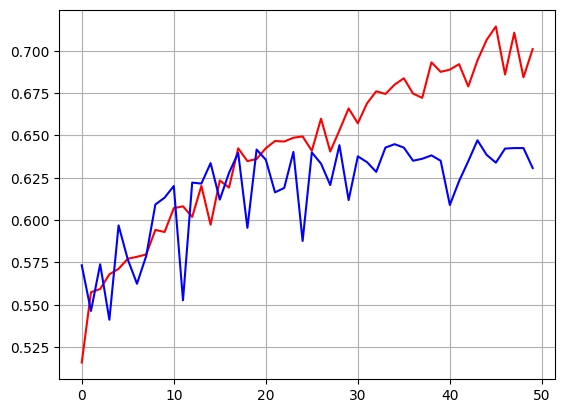

In [17]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color = 'red')
plt.plot(train_history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

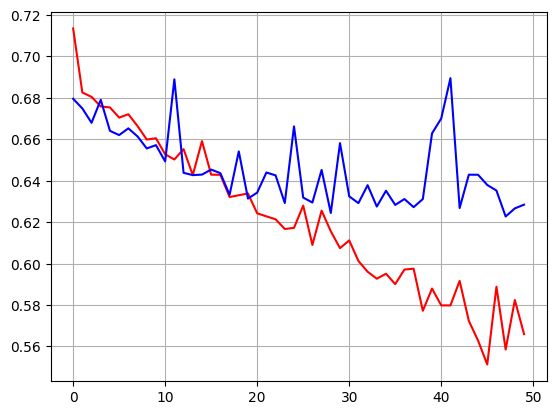

In [18]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()

#### DNN_RGB

In [19]:
# 讀取所有檔案名稱

path = './train/train'
Xfiles = []

import os
for root, dirs, files in os.walk(path):
    for f in files:
        Xfiles.append(root + '/' + f)

In [20]:
# X數據數量及檔名
len(Xfiles), Xfiles[:5]

(21765,
 ['./train/train/00000.jpg',
  './train/train/00001.jpg',
  './train/train/00002.jpg',
  './train/train/00003.jpg',
  './train/train/00004.jpg'])

In [21]:
# y數據
import pandas as pd
yfiles = pd.read_csv('./train/train_labels.csv')
yfiles[:5], \
yfiles.shape

(    filename  infected
 0  00000.jpg         1
 1  00001.jpg         1
 2  00002.jpg         1
 3  00003.jpg         0
 4  00004.jpg         0,
 (21765, 2))

In [22]:
# X數據對應y數據
from tqdm import tqdm
import matplotlib.pyplot as plt

X, y = [], []
for x in tqdm(Xfiles[:]):
    img = plt.imread(x) # <--RGB
    X.append(img)
    y.append(yfiles[yfiles.filename == x.split('/')[-1]]['infected'].values[0])
    # print(x, img.shape, x.split('/')[-1], \
    #       yfiles[yfiles.filename==x.split('/')[-1]]['infected'].values[0])

100%|███████████████████████████████████████████████████████████████████████████| 21765/21765 [01:19<00:00, 273.16it/s]


In [23]:
# 轉換X, y
import numpy as np
X = np.array(X)
y = np.array(y)
X.shape, y.shape

((21765, 128, 128, 3), (21765,))

In [24]:
# 區分出train、test數據
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17412, 128, 128, 3), (4353, 128, 128, 3), (17412,), (4353,))

In [25]:
# 導入函式庫
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from matplotlib import pyplot as plt

# 建立簡單的線性模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units = 256, input_dim = 128 * 128 * 3,
                kernel_initializer = 'normal', activation = 'relu'))               # input + hidder layer
model.add(Dense(units = 128, kernel_initializer = 'normal', activation = 'relu'))  # hidder layer
model.add(Dense(units = 64, kernel_initializer = 'normal', activation = 'relu'))   # hidder layer
model.add(Dense(units = 2, kernel_initializer = 'normal', activation = 'softmax')) # Add output layer

# 選擇損失函數、優化方法及成效衡量方式
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               12583168  
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 2)                 130       
                                                                 
Total params: 12,624,450
Trainable params: 12,624,450
Non-trainable params: 0
_________________________________________________________________


In [26]:
X_train[0].max()

1.0

In [27]:
# 將training的label進行one-hot encoding（例如數字7經過One-hot encoding，轉換後是0000001000，即第7個值為1）
y_TrainOneHot = np_utils.to_categorical(y_train)

# 將training的input資料轉為二維
X_train_2D = X_train.reshape(X_train.shape[0], 128 * 128 * 3).astype('float32')
X_train_norm = X_train_2D  # 將訊號0-255轉換成0-1.0

In [28]:
# 進行訓練，訓練過程會存在train_history變數中
train_history = model.fit(x = X_train_norm,
                          y = y_TrainOneHot,
                          validation_split = 0.2,
                          epochs = 50,
                          batch_size = 800,
                          verbose = 2)

print('Done!!')

Epoch 1/50
18/18 - 6s - loss: 1.0967 - accuracy: 0.4992 - val_loss: 0.7046 - val_accuracy: 0.5096 - 6s/epoch - 308ms/step
Epoch 2/50
18/18 - 5s - loss: 0.6955 - accuracy: 0.5296 - val_loss: 0.6984 - val_accuracy: 0.4938 - 5s/epoch - 276ms/step
Epoch 3/50
18/18 - 5s - loss: 0.6838 - accuracy: 0.5491 - val_loss: 0.6709 - val_accuracy: 0.5541 - 5s/epoch - 296ms/step
Epoch 4/50
18/18 - 5s - loss: 0.6678 - accuracy: 0.5880 - val_loss: 0.6565 - val_accuracy: 0.6147 - 5s/epoch - 305ms/step
Epoch 5/50
18/18 - 6s - loss: 0.6629 - accuracy: 0.5979 - val_loss: 0.6773 - val_accuracy: 0.5478 - 6s/epoch - 307ms/step
Epoch 6/50
18/18 - 7s - loss: 0.6607 - accuracy: 0.5986 - val_loss: 0.6675 - val_accuracy: 0.6026 - 7s/epoch - 396ms/step
Epoch 7/50
18/18 - 7s - loss: 0.6522 - accuracy: 0.6105 - val_loss: 0.6409 - val_accuracy: 0.6351 - 7s/epoch - 373ms/step
Epoch 8/50
18/18 - 7s - loss: 0.6444 - accuracy: 0.6242 - val_loss: 0.6377 - val_accuracy: 0.6437 - 7s/epoch - 390ms/step
Epoch 9/50
18/18 - 7s - 

In [29]:
# 顯示訓練成果(分數)
scores = model.evaluate(X_train_norm, y_TrainOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))

545/545 [==============================] - 8s 15ms/step - loss: 0.5275 - accuracy: 0.7302

	[Info] Accuracy of testing data = 73.0%


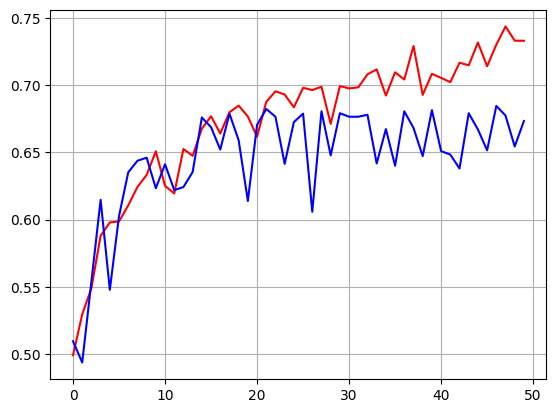

In [30]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color = 'red')
plt.plot(train_history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

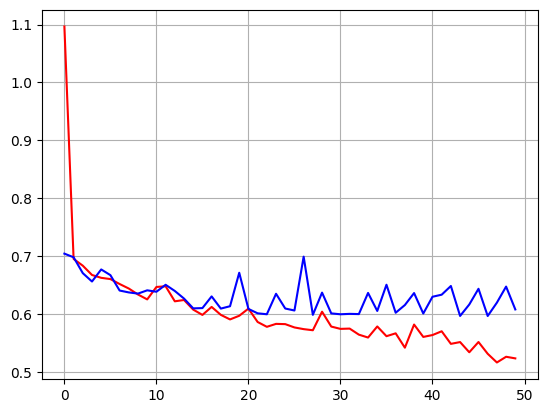

In [31]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()

#### CNN_Gray

In [32]:
# 讀取所有檔案名稱
path = './train/train'
Xfiles = []
import os
for root, dirs, files in os.walk(path):
    for f in files:
        Xfiles.append(root + '/' + f)

In [33]:
# X數據數量及檔名
len(Xfiles), Xfiles[:5]

(21765,
 ['./train/train/00000.jpg',
  './train/train/00001.jpg',
  './train/train/00002.jpg',
  './train/train/00003.jpg',
  './train/train/00004.jpg'])

In [34]:
# y數據
import pandas as pd
yfiles = pd.read_csv('./train/train_labels.csv')
yfiles[:5], \
yfiles.shape

(    filename  infected
 0  00000.jpg         1
 1  00001.jpg         1
 2  00002.jpg         1
 3  00003.jpg         0
 4  00004.jpg         0,
 (21765, 2))

In [35]:
# X數據對應y數據
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage import color

X, y = [], []

for x in tqdm(Xfiles[:]):
    img = color.rgb2gray(plt.imread(x))
    X.append(img)
    y.append(yfiles[yfiles.filename == x.split('/')[-1]]['infected'].values[0])
    # print(x, img.shape, x.split('/')[-1], \
    #       yfiles[yfiles.filename == x.split('/')[-1]]['infected'].values[0])

100%|███████████████████████████████████████████████████████████████████████████| 21765/21765 [01:19<00:00, 274.01it/s]


In [36]:
# 轉換X, y
import numpy as np
X = np.array(X)
X = X.reshape(X.shape[0], 128, 128, 1)
y = np.array(y)
X.shape, y.shape

((21765, 128, 128, 1), (21765,))

In [37]:
# 區分出train、test數據
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17412, 128, 128, 1), (4353, 128, 128, 1), (17412,), (4353,))

In [38]:
# 導入函式庫
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot as plt

# 建立簡單的線性模型
model = keras.models.Sequential()
model.add(Conv2D(filters = 12, kernel_size = (3, 3),
                 activation = 'relu', padding = 'same',
                 input_shape = (128, 128, 1)))
model.add(MaxPooling2D(pool_size = (2, 2))) # 128/2 = 64
model.add(Flatten())

# Add Input layer
model.add(Dense(units = 400,  activation = 'relu'))
model.add(Dense(units = 200, activation = 'relu'))
# Add output layer
model.add(Dense(units = 2, kernel_initializer = 'normal', activation = 'softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 12)      120       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 12)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense_8 (Dense)             (None, 400)               19661200  
                                                                 
 dense_9 (Dense)             (None, 200)               80200     
                                                                 
 dense_10 (Dense)            (None, 2)                 402       
                                                      

In [39]:
X_train[0].max()

0.99358624

In [40]:
# 將training的label進行one-hot encoding（例如數字7經過One-hot encoding，轉換後是0000001000，即第7個值為1）
y_TrainOneHot = np_utils.to_categorical(y_train)

# 將training的input資料轉為二維
X_train_2D = X_train.reshape(X_train.shape[0], 128, 128, 1).astype('float32')
X_train_norm = X_train_2D  # 將訊號0-255轉換成0-1.0

In [41]:
# 進行訓練，訓練過程會存在train_history變數中
train_history = model.fit(x = X_train_norm,
                          y = y_TrainOneHot,
                          validation_split = 0.2,
                          epochs = 50,
                          batch_size = 800,
                          verbose = 2)

print('Done!!')

Epoch 1/50
18/18 - 28s - loss: 1.0714 - accuracy: 0.5067 - val_loss: 0.7173 - val_accuracy: 0.5119 - 28s/epoch - 2s/step
Epoch 2/50
18/18 - 35s - loss: 0.6877 - accuracy: 0.5446 - val_loss: 0.6732 - val_accuracy: 0.5584 - 35s/epoch - 2s/step
Epoch 3/50
18/18 - 33s - loss: 0.6777 - accuracy: 0.5710 - val_loss: 0.6685 - val_accuracy: 0.5820 - 33s/epoch - 2s/step
Epoch 4/50
18/18 - 31s - loss: 0.6680 - accuracy: 0.5831 - val_loss: 0.6605 - val_accuracy: 0.5848 - 31s/epoch - 2s/step
Epoch 5/50
18/18 - 32s - loss: 0.6582 - accuracy: 0.6031 - val_loss: 0.6481 - val_accuracy: 0.6179 - 32s/epoch - 2s/step
Epoch 6/50
18/18 - 34s - loss: 0.6547 - accuracy: 0.6036 - val_loss: 0.6495 - val_accuracy: 0.6204 - 34s/epoch - 2s/step
Epoch 7/50
18/18 - 32s - loss: 0.6265 - accuracy: 0.6499 - val_loss: 0.6290 - val_accuracy: 0.6388 - 32s/epoch - 2s/step
Epoch 8/50
18/18 - 35s - loss: 0.6094 - accuracy: 0.6577 - val_loss: 0.6184 - val_accuracy: 0.6575 - 35s/epoch - 2s/step
Epoch 9/50
18/18 - 34s - loss: 0

In [42]:
# 顯示訓練成果(分數)
scores = model.evaluate(X_train_norm, y_TrainOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))

545/545 [==============================] - 19s 35ms/step - loss: 0.2772 - accuracy: 0.9517

	[Info] Accuracy of testing data = 95.2%


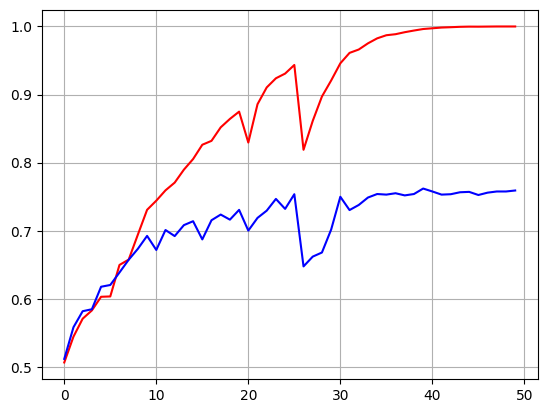

In [43]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color = 'red')
plt.plot(train_history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

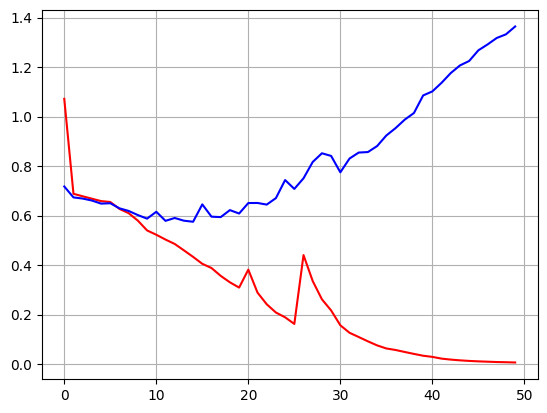

In [44]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()

#### CNN_RGB

In [45]:
# 讀取所有檔案名稱
path = './train/train'
Xfiles = []
import os
for root, dirs, files in os.walk(path):
    for f in files:
        Xfiles.append(root + '/' + f)

In [46]:
# X數據數量及檔名
len(Xfiles), Xfiles[:5]

(21765,
 ['./train/train/00000.jpg',
  './train/train/00001.jpg',
  './train/train/00002.jpg',
  './train/train/00003.jpg',
  './train/train/00004.jpg'])

In [47]:
# y數據
import pandas as pd
yfiles = pd.read_csv('./train/train_labels.csv')
yfiles[:5], \
yfiles.shape

(    filename  infected
 0  00000.jpg         1
 1  00001.jpg         1
 2  00002.jpg         1
 3  00003.jpg         0
 4  00004.jpg         0,
 (21765, 2))

In [48]:
# X數據對應y數據
from tqdm import tqdm
import matplotlib.pyplot as plt

X, y = [], []

for x in tqdm(Xfiles[:]):
    img = plt.imread(x)
    X.append(img)
    y.append(yfiles[yfiles.filename == x.split('/')[-1]]['infected'].values[0])
    # print(x, img.shape, x.split('/')[-1], \
    #       yfiles[yfiles.filename == x.split('/')[-1]]['infected'].values[0])

100%|███████████████████████████████████████████████████████████████████████████| 21765/21765 [01:18<00:00, 277.22it/s]


In [49]:
# 轉換X, y
import numpy as np
X = np.array(X)
X = X.reshape(X.shape[0], 128, 128, 3)
y = np.array(y)
X.shape, y.shape

((21765, 128, 128, 3), (21765,))

In [50]:
# 區分出train、test數據
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17412, 128, 128, 3), (4353, 128, 128, 3), (17412,), (4353,))

In [51]:
# 導入函式庫
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot as plt

# 建立簡單的線性模型
model = keras.models.Sequential()
model.add(Conv2D(filters = 12, kernel_size = (3, 3),
                 activation = 'relu', padding = 'same',
                 input_shape = (128, 128, 3)))
model.add(MaxPooling2D(pool_size = (2, 2))) # 128/2 = 64
model.add(Flatten())

# Add Input layer
model.add(Dense(units = 400,  activation = 'relu'))
model.add(Dense(units = 200, activation = 'relu'))
# Add output layer
model.add(Dense(units = 2, kernel_initializer = 'normal', activation = 'softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 128, 128, 12)      336       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 12)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_11 (Dense)            (None, 400)               19661200  
                                                                 
 dense_12 (Dense)            (None, 200)               80200     
                                                                 
 dense_13 (Dense)            (None, 2)                 402       
                                                      

In [52]:
X_train[0].max()

1.0

In [53]:
# 將training的label進行one-hot encoding（例如數字7經過One-hot encoding，轉換後是0000001000，即第7個值為1）
y_TrainOneHot = np_utils.to_categorical(y_train)

# 將training的input資料轉為二維
X_train_2D = X_train.reshape(X_train.shape[0], 128, 128, 3).astype('float32')
X_train_norm = X_train_2D  # 將訊號0-255轉換成0-1.0

In [54]:
# 進行訓練，訓練過程會存在train_history變數中
train_history = model.fit(x = X_train_norm,
                          y = y_TrainOneHot,
                          validation_split = 0.2,
                          epochs = 50,
                          batch_size = 800,
                          verbose = 2)

print('Done!!')

Epoch 1/50
18/18 - 32s - loss: 5.3440 - accuracy: 0.4991 - val_loss: 0.8202 - val_accuracy: 0.4907 - 32s/epoch - 2s/step
Epoch 2/50
18/18 - 35s - loss: 0.8621 - accuracy: 0.5077 - val_loss: 0.6769 - val_accuracy: 0.5467 - 35s/epoch - 2s/step
Epoch 3/50
18/18 - 36s - loss: 0.6936 - accuracy: 0.5488 - val_loss: 0.6694 - val_accuracy: 0.5889 - 36s/epoch - 2s/step
Epoch 4/50
18/18 - 38s - loss: 0.6667 - accuracy: 0.5877 - val_loss: 0.6510 - val_accuracy: 0.5932 - 38s/epoch - 2s/step
Epoch 5/50
18/18 - 45s - loss: 0.6338 - accuracy: 0.6388 - val_loss: 0.6326 - val_accuracy: 0.6733 - 45s/epoch - 3s/step
Epoch 6/50
18/18 - 41s - loss: 0.6117 - accuracy: 0.6694 - val_loss: 0.6053 - val_accuracy: 0.6888 - 41s/epoch - 2s/step
Epoch 7/50
18/18 - 44s - loss: 0.5940 - accuracy: 0.6881 - val_loss: 0.5903 - val_accuracy: 0.6871 - 44s/epoch - 2s/step
Epoch 8/50
18/18 - 40s - loss: 0.5806 - accuracy: 0.6956 - val_loss: 0.5799 - val_accuracy: 0.6985 - 40s/epoch - 2s/step
Epoch 9/50
18/18 - 40s - loss: 0

In [55]:
# 顯示訓練成果(分數)
scores = model.evaluate(X_train_norm, y_TrainOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))

545/545 [==============================] - 22s 41ms/step - loss: 0.1083 - accuracy: 0.9682

	[Info] Accuracy of testing data = 96.8%


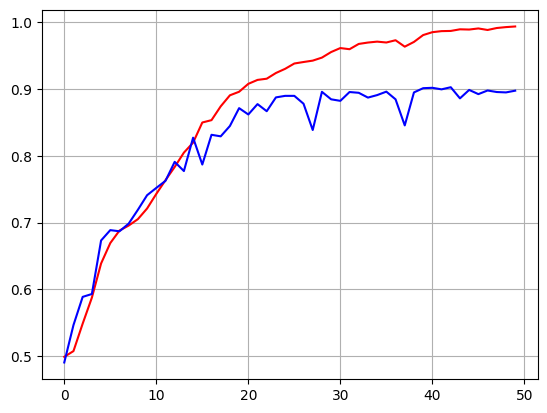

In [56]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color = 'red')
plt.plot(train_history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

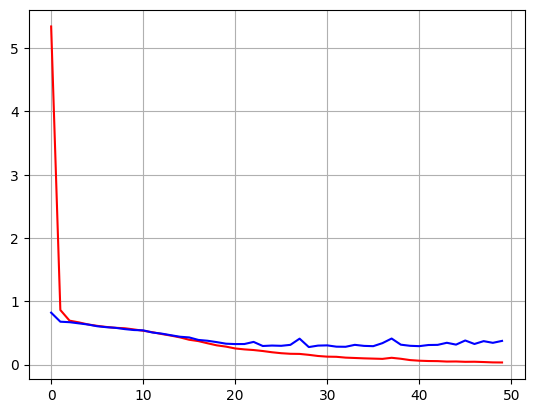

In [57]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()